In [763]:
import yfinance as yf
data=yf.download("BRITANNIA.NS", start="2019-01-01", end="2023-12-31",interval="1d")


[*********************100%%**********************]  1 of 1 completed


In [764]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [765]:
df=data.copy()

# **Close Price**

<Axes: xlabel='Date'>

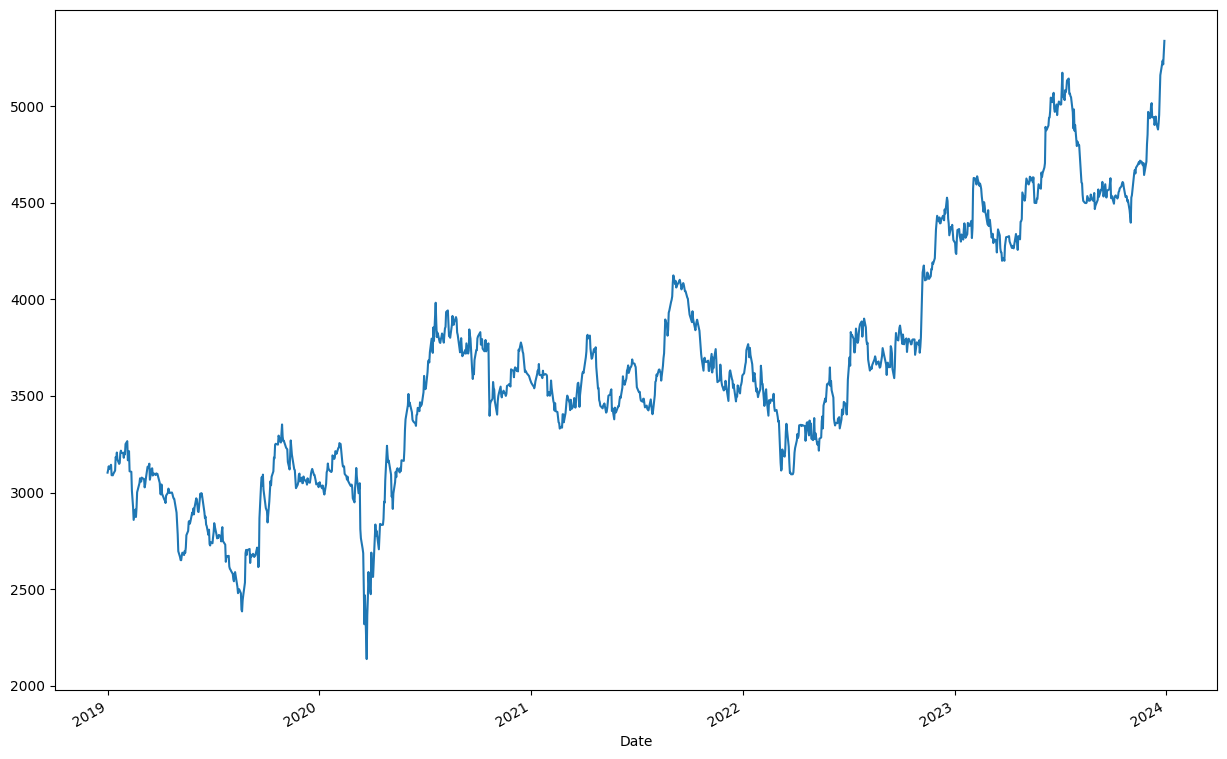

In [766]:
plt.figure(figsize=(15,10))
data.Close.plot()

In [767]:
def calculate_obv(df):
    obv = [0]
    for i in range(1, len(df)):
        if data['Close'][i] > df['Close'][i - 1]:
            obv.append(obv[-1] + df['Volume'][i])
        elif data['Close'][i] < df['Close'][i - 1]:
            obv.append(obv[-1] - df['Volume'][i])
        else:
            obv.append(obv[-1])
    return pd.Series(obv, index=df.index)

# **OBV**

Text(0, 0.5, 'OBV')

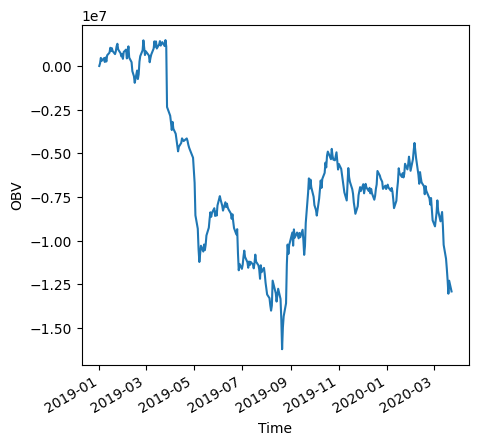

In [768]:
obv=calculate_obv(df)
plt.figure(figsize=(5,5))
obv[0:300].plot()
plt.xlabel('Time')
plt.ylabel('OBV')

In [769]:
def calculate_adx(high, low, close, window=14):
    # Calculate True Range (TR)
    tr = pd.DataFrame()
    tr['pdm'] = high - high.shift(1)
    tr['ndm'] = low.shift(1) - low
    tr['tr'] = tr[['pdm', 'ndm']].max(axis=1)

    # Calculate Directional Movement Index (DMI)
    dm_pos = (high - high.shift(1)).clip(lower=0)
    dm_neg = (low.shift(1) - low).clip(lower=0)
    atr = tr['tr'].rolling(window=window).mean()
    di_pos = 100 * (dm_pos.rolling(window=window).mean() / atr)
    di_neg = 100 * (dm_neg.rolling(window=window).mean() / atr)

    # Calculate DX
    dx = 100 * abs(di_pos - di_neg) / (di_pos + di_neg)

    # Calculate ADX
    adx = dx.rolling(window=window).mean()

    return pd.DataFrame({'ADX': adx})

# **Average Directional Index**

Text(0, 0.5, 'ADX')

<Figure size 2500x2000 with 0 Axes>

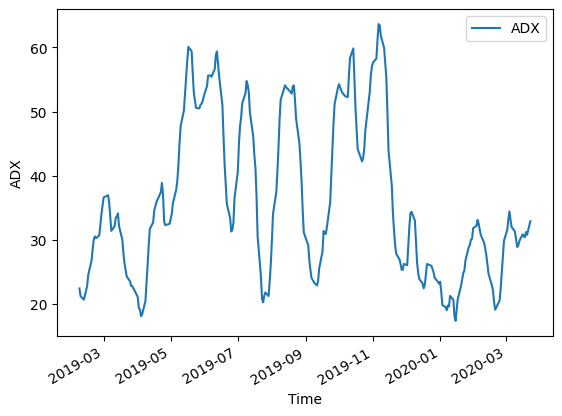

In [770]:
adx=calculate_adx(df['High'],df['Low'],df['Close'])
adx
plt.figure(figsize=(25,20))
adx[:300].plot()
plt.xlabel('Time')
plt.ylabel('ADX')

In [771]:
def calculate_macd(df, short_window=9, long_window=21, signal_window=26):
    small_ema = df['Close'].ewm(span=short_window, min_periods=0, adjust=False).mean()
    large_ema = df['Close'].ewm(span=long_window, min_periods=0, adjust=False).mean()

    macd_line = small_ema - large_ema
    signal_line = macd_line.ewm(span=signal_window, min_periods=0, adjust=False).mean()
    macd_final = macd_line - signal_line

    return macd_final


# **Moving Average Convergence Divergence**

Text(0, 0.5, 'MACD')

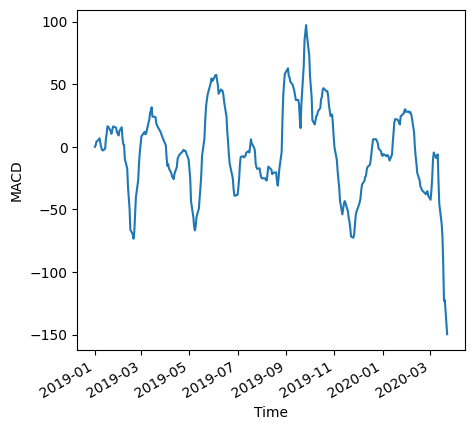

In [772]:
macd=calculate_macd(df)
plt.figure(figsize=(5,5))
macd[:300].plot()
plt.xlabel('Time')
plt.ylabel('MACD')

In [773]:
def calculate_rsi(df, window=14):
    change = df['Close'].diff(1)
    profit = (change.where(change > 0, 0)).rolling(window=window, min_periods=1).mean()
    loss = (-change.where(change < 0, 0)).rolling(window=window, min_periods=1).mean()
    rs = profit / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


# **Relative Strength Index**

Text(0, 0.5, 'RSI')

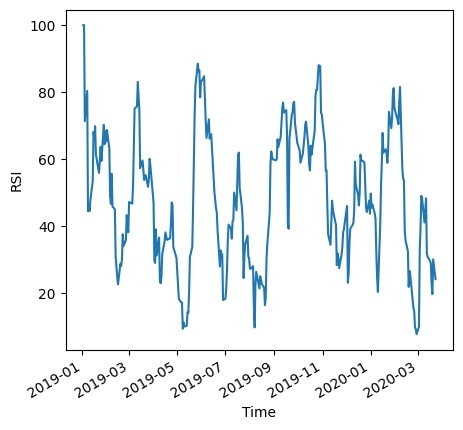

In [774]:
rsi=calculate_rsi(df)
plt.figure(figsize=(5,5))
rsi[0:300].plot()
plt.xlabel('Time')
plt.ylabel('RSI')

In [775]:
def calculate_ema(data, window):
    # Calculate the smoothing factor
    alpha = 2 / (window + 1)
    ema=pd.Series(index=data.index, dtype=float)
    mean=np.mean(data['Close'][:window-1])
    ema.iloc[window-1]=mean
    for i in range(window,len(data)):
        ema.iloc[i]=(data['Close'].iloc[i] * alpha) + (ema.iloc[i-1] * (1 - alpha))

    return ema

# **EMA (9,21)**

Text(0, 0.5, 'EMA(9,21)')

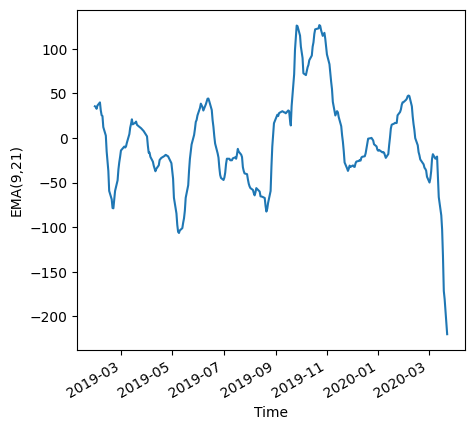

In [776]:
ema_9=calculate_ema(df,9)
ema_21=calculate_ema(df,21)

ma_short=ema_9-ema_21

plt.figure(figsize=(5,5))
ma_short[:300].plot()
plt.xlabel('Time')
plt.ylabel('EMA(9,21)')

In [777]:
def calculate_support(data):
    pivot_point=pd.Series(index=data.index,dtype=float)
    first_support=pd.Series(index=data.index,dtype=float)
    second_support=pd.Series(index=data.index,dtype=float)
    for i in range(1,len(data)):
      pivot_point.iloc[i] = (data['High'].iloc[i-1] + data['Low'].iloc[i-1] + data['Close'].iloc[i-1]) / 3
      first_support.iloc[i] = (2 * pivot_point.iloc[i]) - data['High'].iloc[i-1]
      second_support.iloc[i] = pivot_point.iloc[i] - (data['High'].iloc[i-1] - data['Low'].iloc[i-1])
    return first_support,second_support


In [778]:
def calculate_difference(price, close_price):
    difference = (price - close_price)
    return difference

# **MODDED SUPPORT**

Difference between the Support value of the day and the closing price

Text(0, 0.5, 'S1')

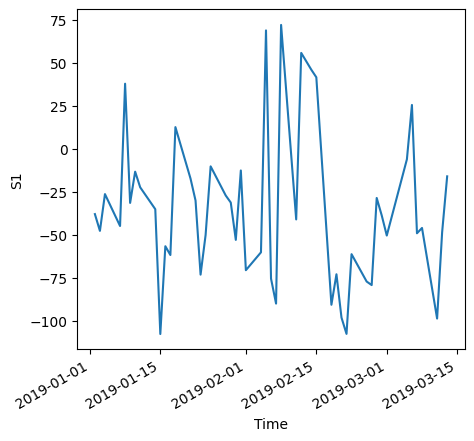

In [779]:
first_support,second_support = calculate_support(df)

differences1 = calculate_difference(first_support,df['Close'])
plt.figure(figsize=(5,5))
differences1[:50].plot()
plt.xlabel('Time')
plt.ylabel('S1')

Text(0, 0.5, 'S2')

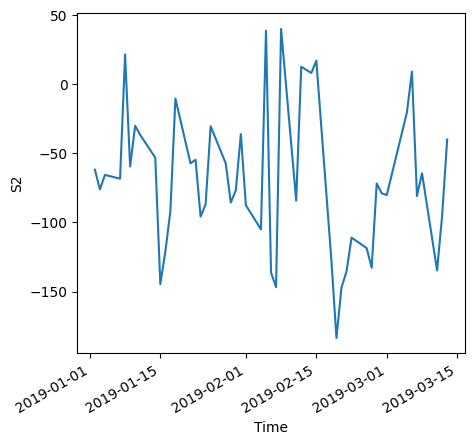

In [780]:
differences2 = calculate_difference(second_support,df['Close'])
plt.figure(figsize=(5,5))
differences2[:50].plot()
plt.xlabel('Time')
plt.ylabel('S2')

In [781]:
def calculate_resistance(data):
    pivot_point=pd.Series(index=data.index,dtype=float)
    first_resistance=pd.Series(index=data.index,dtype=float)
    second_resistance=pd.Series(index=data.index,dtype=float)
    for i in range(1,len(data)):
      pivot_point.iloc[i] = (data['High'].iloc[i-1] + data['Low'].iloc[i-1] + data['Close'].iloc[i-1]) / 3
      first_resistance.iloc[i] = (2 * pivot_point.iloc[i]) - data['Low'].iloc[i-1]
      second_resistance.iloc[i] = pivot_point.iloc[i] + (data['High'].iloc[i-1] - data['Low'].iloc[i-1])
    return first_resistance,second_resistance


# **MODDED RESISTANCE**

Difference between the Resistance vakue of the day and the closing price

Text(0, 0.5, 'R1')

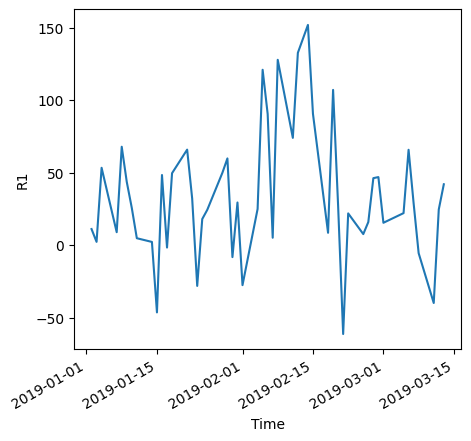

In [782]:
first_resistance,second_resistance = calculate_resistance(df)

differences3 = calculate_difference(first_resistance,df['Close'])
plt.figure(figsize=(5,5))
differences3[:50].plot()
plt.xlabel('Time')
plt.ylabel('R1')

Text(0, 0.5, 'R2')

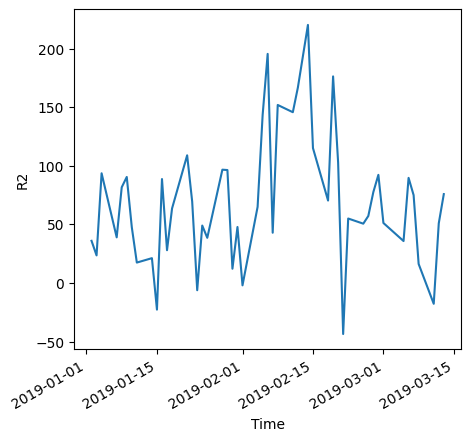

In [783]:
differences4 = calculate_difference(second_resistance,df['Close'])
plt.figure(figsize=(5,5))
differences4[:50].plot()
plt.xlabel('Time')
plt.ylabel('R2')

In [784]:
def calculate_bollinger_bands(data, window_size=20, num_std_dev=2):
    rolling_mean=pd.Series(index=data.index,dtype=float)
    rolling_std=pd.Series(index=data.index,dtype=float)
    upper_band=pd.Series(index=data.index,dtype=float)
    lower_band=pd.Series(index=data.index,dtype=float)
    rolling_mean = data.rolling(window=window_size).mean()
    rolling_std = data.rolling(window=window_size).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return upper_band,lower_band

# **BOLLINGER BANDS**

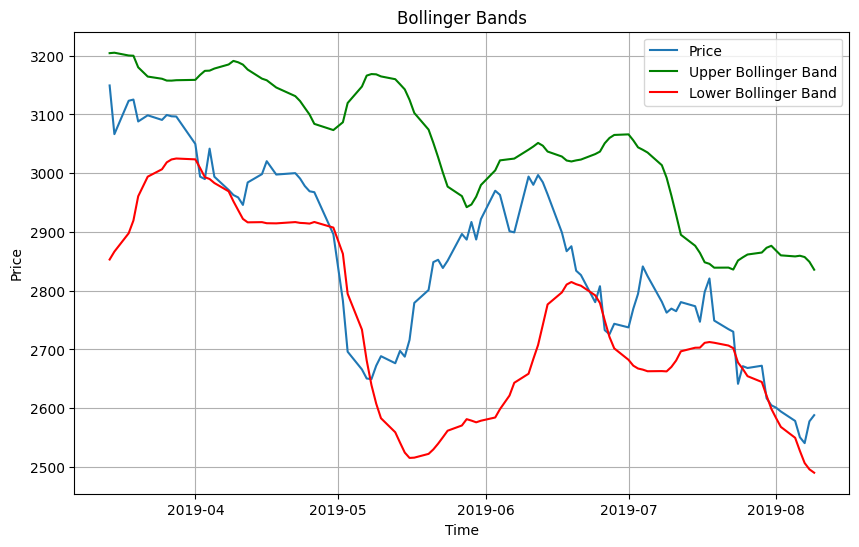

In [785]:
    upper,lower=calculate_bollinger_bands(df['Close'])
    dat=df['Close'][50:150]
    upp=upper[50:150]
    low=lower[50:150]
    plt.figure(figsize=(10, 6))
    plt.plot(dat, label='Price')
    plt.plot(upp, label='Upper Bollinger Band', color='green')
    plt.plot(low, label='Lower Bollinger Band', color='red')
    plt.title('Bollinger Bands')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [786]:
data["Signal"]=pd.Series(index=data.index)
data["Worth"]=pd.Series(index=data.index)
data["Daily_Return"]=pd.Series(index=data.index)
data["SD_Vol"]=pd.Series(index=data.index)

<ipython-input-786-71ffeb8fb3f8>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data["Signal"]=pd.Series(index=data.index)
<ipython-input-786-71ffeb8fb3f8>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data["Worth"]=pd.Series(index=data.index)
<ipython-input-786-71ffeb8fb3f8>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data["Daily_Return"]=pd.Series(index=data.index)
<ipython-input-786-71ffeb8fb3f8>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data["SD_Vol"]=pd.Series(index=data.index)


In [787]:
data["Daily_Return"].iloc[0]=0
for i in range(1,len(data)):
  data["Daily_Return"].iloc[i]=(np.log(data["Close"].iloc[i]/data["Close"].iloc[i-1]))*100  # Calculates the logarithmic Return
  data["SD_Vol"].iloc[i]=np.std(data["Daily_Return"][0:i])/1.33                                # Calculates Standard Deviation of Daily Return


<ipython-input-787-02f655d72eee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Daily_Return"].iloc[0]=0
<ipython-input-787-02f655d72eee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Daily_Return"].iloc[i]=(np.log(data["Close"].iloc[i]/data["Close"].iloc[i-1]))*100  # Calculates the logarithmic Return
<ipython-input-787-02f655d72eee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SD_Vol"].iloc[i]=np.std(data["

# **Moving Mean of Daily Return**

In [788]:
def calculate_feature1(data,window=4):
  rolling_mean=pd.Series(index=data.index,dtype=float)
  rolling_mean = data.rolling(window).mean()
  return rolling_mean

Text(0, 0.5, 'Feature_1')

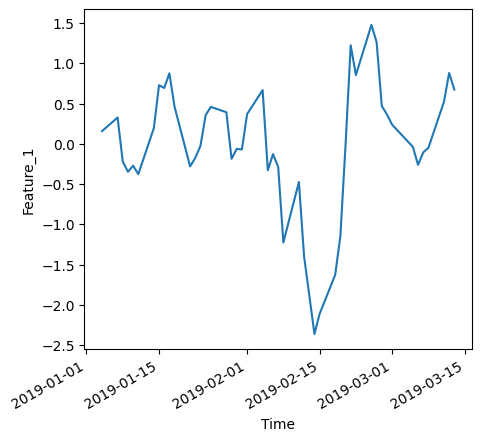

In [789]:
mean_daily = calculate_feature1(data['Daily_Return'])
plt.figure(figsize=(5,5))
mean_daily[:50].plot()
plt.xlabel('Time')
plt.ylabel('Feature_1')

# **Moving Mean of Difference between Open and Close**

In [790]:
def calculate_feature2(data,window=4):
 rolling_mean=pd.Series(index=data.index,dtype=float)
 rolling_mean = data.rolling(window).mean()
 return rolling_mean

Text(0, 0.5, 'Feature_2')

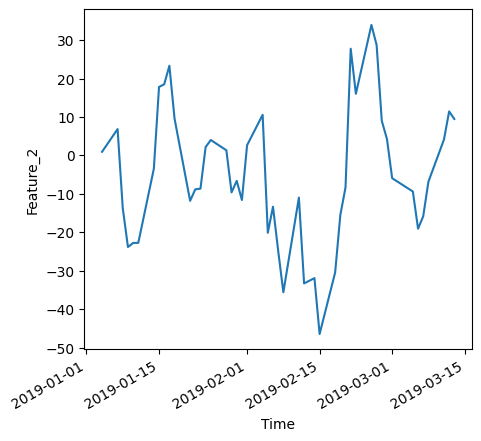

In [791]:
mean_f2 = calculate_feature2(data['Close']-data['Open'])
plt.figure(figsize=(5,5))
mean_f2[:50].plot()
plt.xlabel('Time')
plt.ylabel('Feature_2')

In [792]:
def construct_features(data):
    data['ADX'] = calculate_adx(data['High'],data['Low'],data['Close'])
    data['OBV']=calculate_obv(data)
    data['MACD']=calculate_macd(data)
    data['RSI']=calculate_rsi(data)
    data['EMA-9-21']=calculate_ema(data,9)-calculate_ema(data,21)
    res1,res2=calculate_resistance(data)
    res_diff1=calculate_difference(res1,data['Close'])
    res_diff2=calculate_difference(res2,data['Close'])
    data['Mod_Resistance1']=res_diff1
    data['Mod_Resistance2']=res_diff2
    sup1,sup2=calculate_support(data)
    sup_diff1=calculate_difference(sup1,data['Close'])
    sup_diff2=calculate_difference(sup2,data['Close'])
    data['Mod_Support1']=sup_diff1
    data['Mod_Support2']=sup_diff2
    upper,lower=calculate_bollinger_bands(data['Close'])
    data['Upper_Band']=upper-data['Close']
    data['Lower_Band']=lower-data['Close']
    data['feature_1']=calculate_feature1(data['Daily_Return'])
    data['feature_2']=calculate_feature2(data['Close']-data['Open'])
    return data


In [793]:
class Softmax:
    def __init__(self):
        self.input = None

    def forward(self, input_data):
        self.input = input_data
        exp_values = np.exp(input_data - np.max(input_data, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        return probabilities

    def backward(self, dvalues):
        return dvalues

def cross_entropy_loss(predictions, targets):
    epsilon = 1e-10
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    N = predictions.shape[0]
    cross_entropy = -np.sum(targets * np.log(predictions)) / N
    return cross_entropy

def backward_pass_softmax_with_cross_entropy(predictions, targets):
    dvalues = (predictions - targets) / predictions.shape[0]
    return dvalues


In [794]:
data = construct_features(data)

# **LABELING**

In [795]:
data['Signal'].iloc[0]='Buy'
stop =0
data['Worth'].iloc[0]=data['Close'].iloc[0]
for i in range(1,len(data)-1):
  if data['Close'].iloc[i]<(data["SD_Vol"].iloc[i]/100 +1)*data['Worth'].iloc[i-1] and data['Close'].iloc[i]>=(-data["SD_Vol"].iloc[i]/200 +1)*data['Worth'].iloc[i-1]:
    data['Signal'].iloc[i]='Hold'
    data['Worth'].iloc[i]=data['Worth'].iloc[i-1]
  elif data['Close'].iloc[i]<(-data["SD_Vol"].iloc[i]/200 +1)*data['Worth'].iloc[i-1]:
    data['Signal'].iloc[i]='Sell'
    stop=data['Close'].iloc[i]
    data['Worth'].iloc[i]=0
  elif data['Worth'].iloc[i-1]==0:
    if data['Close'].iloc[i-1]>data['Close'].iloc[i] and data['Close'].iloc[i]<data['Close'].iloc[i+1]:
      stop=data['Close'].iloc[i]
    if data['Close'].iloc[i]>=stop and data['Close'].iloc[i+1]>data['Close'].iloc[i]:
      data['Signal'].iloc[i]='Buy'
      data['Worth'].iloc[i]=data['Close'].iloc[i]
    else:
      data['Signal'].iloc[i]='Hold'
      data['Worth'].iloc[i]=data['Worth'].iloc[i-1]
  elif data['Close'].iloc[i]>(data["SD_Vol"].iloc[i]/100 +1)*data['Worth'].iloc[i-1] and data['Close'].iloc[i+1]<data['Close'].iloc[i]:
    data['Signal'].iloc[i]='Sell'
    stop=data['Close'].iloc[i]
    data['Worth'].iloc[i]=0
  else :
    data['Signal'].iloc[i]='Hold'
    data['Worth'].iloc[i]=data['Worth'].iloc[i-1]

<ipython-input-795-85d507e480c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'].iloc[0]='Buy'
<ipython-input-795-85d507e480c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Worth'].iloc[0]=data['Close'].iloc[0]
<ipython-input-795-85d507e480c0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Worth'].iloc[i]=data['Worth'].iloc[i-1]
<ipython-input-795-85d507e480c0>:24: SettingWithCopyWarning: 
A value is 

In [796]:
signal=data["Signal"][:100]

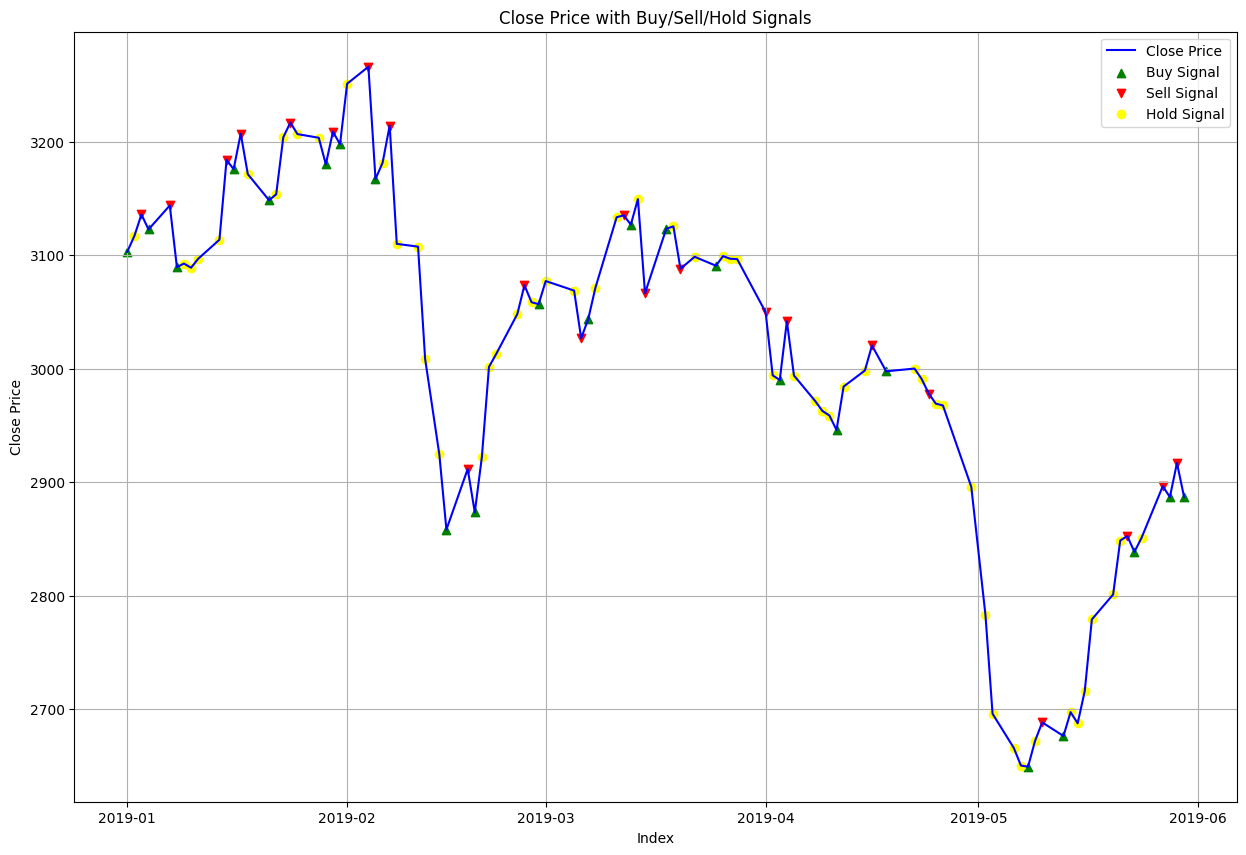

In [797]:
buy_signal = signal[signal == "Buy"].index
sell_signal = signal[signal == "Sell"].index
hold_signal = signal[signal == "Hold"].index


plt.figure(figsize=(15, 10))

# Plot close price data
plt.plot(data["Close"][:100], label="Close Price", color="blue")

# Plot buy signals
plt.scatter(buy_signal, data.loc[buy_signal, "Close"], marker="^", color="green", label="Buy Signal")

# Plot sell signals
plt.scatter(sell_signal, data.loc[sell_signal, "Close"], marker="v", color="red", label="Sell Signal")

# Plot hold signals
plt.scatter(hold_signal, data.loc[hold_signal, "Close"], marker="o", color="yellow", label="Hold Signal")

plt.xlabel("Index")
plt.ylabel("Close Price")
plt.title("Close Price with Buy/Sell/Hold Signals")
plt.legend()
plt.grid(True)
plt.show()


In [798]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

# **Preprocessing**

In [799]:
data_copy=data.copy()
data_copy.drop("Worth", axis=1, inplace=True)
data_copy.dropna(inplace=True)
pd.set_option('display.max_columns', None)

In [800]:
data_copy.drop("Open", axis=1, inplace=True)
data_copy.drop("High", axis=1, inplace=True)
data_copy.drop("Low", axis=1, inplace=True)
data_copy.drop("Daily_Return", axis=1, inplace=True)
data_copy.drop("SD_Vol", axis=1, inplace=True)
data_copy.drop("Adj Close", axis=1, inplace=True)

In [801]:
y=data_copy["Signal"]
data_copy.drop("Signal", axis=1, inplace=True)
data_copy.drop("Close", axis=1, inplace=True)
data_copy.drop("Volume", axis=1, inplace=True)
x=data_copy

In [802]:
for i in range(len(data_copy)):
  if y.iloc[i]=='Buy':
    y.iloc[i]=1
  elif y.iloc[i]=='Hold':
    y.iloc[i]=2
  else:
    y.iloc[i]=0

<ipython-input-802-92be87889b2d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i]=0
<ipython-input-802-92be87889b2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i]=2
<ipython-input-802-92be87889b2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i]=1


In [803]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data_copy, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_classes = len(set(y_train))

def to_one_hot(labels, num_classes):
    num_samples = len(labels)
    one_hot_labels = np.zeros((num_samples, num_classes))
    for i in range(num_samples):
        one_hot_labels[i, labels[i]] = 1
    return one_hot_labels

y_train_encoded = to_one_hot(y_train, num_classes)
y_test_encoded = to_one_hot(y_test, num_classes)

def initialize_parameters(input_size, output_size):
    #np.random.seed(42)
    W = np.random.randn(input_size, output_size) * 0.01
    b = np.zeros((1, output_size))
    return W, b

def softmax(Z):
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

def forward_propagation(X, W, b):
    Z = np.dot(X, W) + b
    A = softmax(Z)
    return A

def compute_loss(A, Y):
    m = Y.shape[0]
    loss = -np.mean(Y * np.log(A + 1e-8))
    return loss

def backward_propagation(X, A, Y):
    m = X.shape[0]
    dZ = A - Y
    dW = np.dot(X.T, dZ) / m
    db = np.mean(dZ, axis=0, keepdims=True)
    return dW, db

def update_parameters(W, b, dW, db, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

def train_model(X_train, y_train, X_test, y_test, num_classes, learning_rate=0.001, epochs=100, batch_size=32):
    input_size = X_train.shape[1]
    output_size = num_classes

    W, b = initialize_parameters(input_size, output_size)

    for epoch in range(epochs):
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]

            A = forward_propagation(X_batch, W, b)
            loss = compute_loss(A, y_batch)
            dW, db = backward_propagation(X_batch, A, y_batch)
            W, b = update_parameters(W, b, dW, db, learning_rate)

        if epoch % 10 == 0:
            train_loss = compute_loss(forward_propagation(X_train, W, b), y_train)
            test_loss = compute_loss(forward_propagation(X_test, W, b), y_test)
            print(f'Epoch {epoch}: Train Loss = {train_loss}, Test Loss = {test_loss}')

    return W, b

W, b = train_model(X_train_scaled, y_train_encoded, X_test_scaled, y_test_encoded, num_classes)

train_accuracy = np.mean(np.argmax(forward_propagation(X_train_scaled, W, b), axis=1) == y_train)
test_predicted= forward_propagation(X_test_scaled, W, b)
train_predicted=forward_propagation(X_train_scaled, W, b)
test_accuracy = np.mean(np.argmax(forward_propagation(X_test_scaled, W, b), axis=1) == y_test)
print(f'Train Accuracy: {train_accuracy*100}')
print(f'Test Accuracy: {test_accuracy*100}')



Epoch 0: Train Loss = 0.3635283181140441, Test Loss = 0.36397875774398586
Epoch 10: Train Loss = 0.34533317166849187, Test Loss = 0.34704578491313054
Epoch 20: Train Loss = 0.3320064396402105, Test Loss = 0.3348451050821897
Epoch 30: Train Loss = 0.32177016252961854, Test Loss = 0.32556645557727415
Epoch 40: Train Loss = 0.3137499006083215, Test Loss = 0.31833966704390193
Epoch 50: Train Loss = 0.3074020929597153, Test Loss = 0.3126429909537093
Epoch 60: Train Loss = 0.3023442266888542, Test Loss = 0.3081197300873628
Epoch 70: Train Loss = 0.2982920811999022, Test Loss = 0.3045095853428349
Epoch 80: Train Loss = 0.29502940172037556, Test Loss = 0.3016164192363327
Epoch 90: Train Loss = 0.29238971492884136, Test Loss = 0.2992898923486326
Train Accuracy: 63.3160621761658
Test Accuracy: 63.22314049586777


In [804]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score,f1_score

# **ROC-AUC SCORE  AND F1 SCORE**

In [805]:

roc_auc = roc_auc_score(np.argmax(y_test_encoded, axis=1), test_predicted, multi_class='ovr')
f1 = f1_score(np.argmax(y_test_encoded, axis=1),np.argmax(test_predicted, axis=1), average='weighted')

In [806]:
roc_auc*100

62.876920967970406

In [807]:
f1*100

53.57385033013921